In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [40]:
# Abrir imagen
img = cv2.imread('Ajolopesos.jpg') 

# Convertir a escala de grises
escala_grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


In [41]:
u, s, v, = np.linalg.svd(escala_grises, full_matrices=True)

Varianza explicada de los primeros 20 vectores:
[9.45635e-01 1.02300e-02 6.17800e-03 4.98100e-03 2.24700e-03 1.20400e-03
 1.01200e-03 8.69000e-04 8.29000e-04 6.68000e-04 6.18000e-04 5.29000e-04
 4.95000e-04 4.41000e-04 4.14000e-04 3.85000e-04 3.48000e-04 3.39000e-04
 3.10000e-04 2.84000e-04]


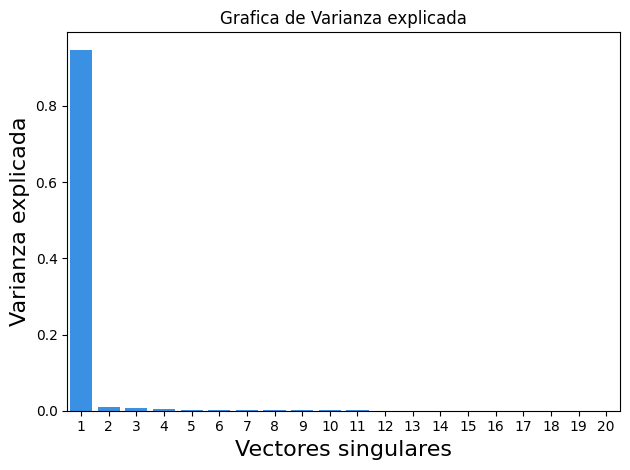

In [42]:
# import module 
import seaborn as sns 
  
var_explicada = np.round(s**2/np.sum(s**2), decimals=6) 
  
print(f'Varianza explicada de los primeros 20 vectores:\n{var_explicada[0:20]}') 
  
sns.barplot(x=list(range(1, 21)), 
            y=var_explicada[0:20], color="dodgerblue") 
  
plt.title('Grafica de Varianza explicada') 
plt.xlabel('Vectores singulares', fontsize=16) 
plt.ylabel('Varianza explicada', fontsize=16) 
plt.tight_layout() 
plt.show() 

La matriz inicial nos presenta cuando porcentaje de la información contiene el n-ésimo vector y la gráfica nos muestra los 20 vectores singulares que contienen la mayor información con sus respectivos valores singulares.

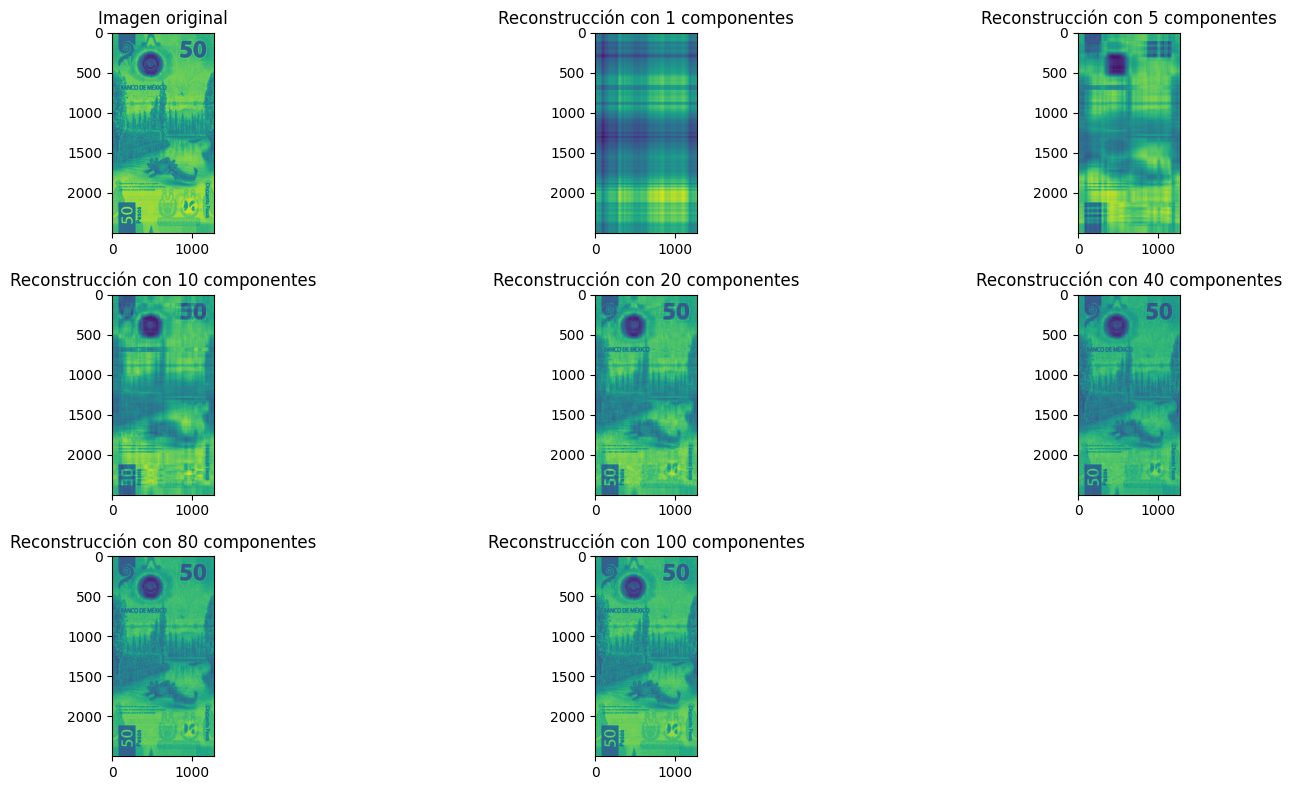

In [ ]:
n, m = escala_grises.shape
componentes = [min(n, m), 1, 5, 10, 20, 40, 80, 100]
plt.figure(figsize=(16, 8))

for i in range(len(componentes)):
    rango_reducido = u[:, :componentes[i]] @ np.diag(s[:componentes[i]]) @ v[:componentes[i], :]
    
    plt.subplot(3, 3, i+1)
    plt.imshow(rango_reducido, cmap='gray')
    if i == 0:
        plt.title(f'Imagen original')
    else:
        plt.title(f'Reconstrucción con {componentes[i]} componentes')

plt.tight_layout()
plt.show()

    

Con 5 componentes ya es posible discernir la silueta de la imagen y conforme se aumentan la cantidad de componentes (vectores), la imagen va siendo cada vez mas clara, con 40 aun se ve un poco difusa, pero al tener 80 y 100 la diferencia con la imagen original es casi nula.